In [1]:
from funcoesTermosol import *
import numpy as np
import math

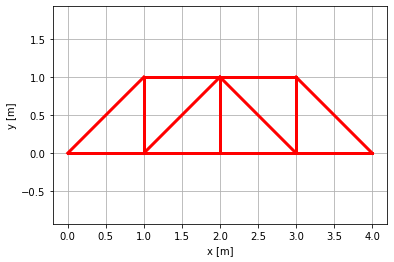

In [2]:
input_data = "aps3_entrada.xlsx"
[nn,N,nm,Inc,nc,F,nr,R] = importa(input_data)
plota(N, Inc)

In [3]:
# Comprimento do Membro (m)
L = 1

In [4]:
def vet_conec(ne):
  conec_array = np.array(nn*[0])
  n1 = int(Inc[ne, 0])
  n2 = int(Inc[ne, 1])
  conec_array[n1 - 1] = -1
  conec_array[n2 - 1] = 1
  return conec_array

def mat_conec():
  mat = []
  for i in range(nm):
    mat.append(vet_conec(i))
  return np.array(mat)

C = mat_conec()
C_Transposto = C.T
print(f'Matriz de Conectividade:\n\n {C}')
print("____________________________________")
print(" ")
print(f'Matriz de Conectividade Transposta:\n\n {C_Transposto}')

Matriz de Conectividade:

 [[-1  1  0  0  0  0  0  0]
 [-1  0  0  0  0  1  0  0]
 [ 0 -1  1  0  0  0  0  0]
 [ 0 -1  0  0  0  1  0  0]
 [ 0 -1  0  0  0  0  1  0]
 [ 0  0 -1  1  0  0  0  0]
 [ 0  0 -1  0  0  0  1  0]
 [ 0  0  0 -1  1  0  0  0]
 [ 0  0  0 -1  0  0  1  0]
 [ 0  0  0 -1  0  0  0  1]
 [ 0  0  0  0 -1  0  0  1]
 [ 0  0  0  0  0 -1  1  0]
 [ 0  0  0  0  0  0 -1  1]]
____________________________________
 
Matriz de Conectividade Transposta:

 [[-1 -1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 -1 -1 -1  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0 -1 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0 -1 -1 -1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0 -1  0  0]
 [ 0  1  0  1  0  0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  1  0  1  0  1  0  0  1 -1]
 [ 0  0  0  0  0  0  0  0  0  1  1  0  1]]


In [5]:
M = np.matmul(N, C_Transposto)
print(f'Matriz dos Membros:\n\n {M}')

Matriz dos Membros:

 [[ 1.  1.  1.  0.  1.  1.  0.  1. -1.  0. -1.  1.  1.]
 [ 0.  1.  0.  1.  1.  0.  1.  0.  1.  1.  1.  0.  0.]]


In [10]:
def calc_Se(m_e, l, E):
  S_e = (E*A/l)*(np.matmul(m_e.T, m_e)/(np.linalg.norm(m_e))**2)
  if (np.linalg.norm(m_e))**2 == 0:
    S_e = np.zeros((2, 2))
  return S_e

def calc_Ke(c_e, S_e):
  mul_C = np.matmul(c_e.T, c_e)
  K_e = (np.kron(mul_C, S_e))
  return K_e

def calc_l(element):
  x1 = N[0][int(Inc[:,0][element]) - 1]
  x2 = N[0][int(Inc[:, 1][element]) - 1]
  y1 = N[1][int(Inc[:, 0][element]) - 1]
  y2 = N[1][int(Inc[:, 1][element]) - 1]
  l = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
  return l

In [11]:
shape_Kg = 2*nn
K_g = np.zeros((shape_Kg, shape_Kg))

for element in range(0, nm):
    E = Inc[element, 2]
    A = Inc[element, 3]
    
    m_e = (M[:, element])[np.newaxis]

    m_e_transposed = m_e.T

    c_e = (C[element, :])[np.newaxis]
    c_e_transposed = c_e.T

    S_e = calc_Se(m_e, calc_l(element), E)
    print(f'Matriz S{element+1}:\n {S_e}')
    print("__________________")

    K_e = calc_Ke(c_e, S_e)
    print(f'Matriz K{element+1}:\n {K_e}')
    print("__________________")

    K_g += K_e
    print(" ")

print(f'Matriz K_g:\n {K_g}')
print("__________________")

Matriz S1:
 [[4.2e+09 0.0e+00]
 [0.0e+00 0.0e+00]]
__________________
Matriz K1:
 [[ 4.2e+09  0.0e+00 -4.2e+09 -0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00
   0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00 -0.0e+00 -0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00
   0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00]
 [-4.2e+09 -0.0e+00  4.2e+09  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00
   0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00]
 [-0.0e+00 -0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00
   0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00
   0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00
   0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0

In [12]:
def desloc_nodais(K_g, F):
  u = np.linalg.solve(K_g, F)
  return u

def cond_contorno(Kg):
  try:
    K_g = np.delete(Kg, R.astype(int), 0)
    K_g_new = np.delete(K_g, R.astype(int), 1)
    F_new = np.delete(F, R.astype(int), 0)
  except ValueError:
      print( "Not Defined")
  return K_g_new, F_new

K_g_new, F_new = cond_contorno(K_g)
u = desloc_nodais(K_g_new, F_new)
print(u)

[[-7.14285714e-07]
 [ 2.24503335e-23]
 [-4.75489589e-06]
 [ 7.14285714e-07]
 [ 3.94489107e-07]
 [-1.51027280e-06]
 [-7.87770260e-23]
 [-4.75489589e-06]
 [-3.94489107e-07]
 [-1.51027280e-06]]


In [13]:
def complete_u(u, R): 
    U_SIZE = u.shape[0] + R.shape[0]
    u_ = np.zeros((U_SIZE, 1))
    
    li = []
    for i in range(0, U_SIZE):
        if i not in R.astype(int):
            li.append(i)
            
    for i in range(0, u.shape[0]):
        u_[li[i]] = u[i]
        
    return u_

u_ = complete_u(u, R)
print(f'Matriz de Deslocamento Nodal:\n {u_}')
print("__________________")

Matriz de Deslocamento Nodal:
 [[ 0.00000000e+00]
 [ 0.00000000e+00]
 [-7.14285714e-07]
 [ 0.00000000e+00]
 [ 2.24503335e-23]
 [-4.75489589e-06]
 [ 7.14285714e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 3.94489107e-07]
 [-1.51027280e-06]
 [-7.87770260e-23]
 [-4.75489589e-06]
 [-3.94489107e-07]
 [-1.51027280e-06]]
__________________


In [14]:
def reac_apoio(K, u):
    li = []
    for i in range(0, u.shape[0] + R.shape[0]):
        if i not in R.astype(int):
            li.append(i)
    f = np.matmul(K, u)
    f_new = np.delete(f, li)
    return f_new

support_reaction = reac_apoio(K_g, u_)
support_reaction = support_reaction.reshape((support_reaction.shape[0],1))
print(f'Matriz das Reações de Apoio:\n {support_reaction}')
print("__________________")

Matriz das Reações de Apoio:
 [[ 4656.85424949]
 [ 1656.85424949]
 [12343.14575051]
 [12343.14575051]
 [-4656.85424949]
 [ 1656.85424949]]
__________________


<ipython-input-14-4cb5606c8fad>:7: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  f_new = np.delete(f, li)


In [15]:
def sin_cos(x2, x1, y2, y1, l):
  s = (y2 - y1)/l
  c = (x2 - x1)/l
  return s, c

def calc_deform_esp_G(c, s, mat_u, l):
  return (1/l)* np.matmul([-c, -s, c, s], mat_u)

def calc_tensao_interna(c, s, mat_u, l):
  return (E/l)*np.matmul([-c, -s, c, s], mat_u)

deform_matriz = np.zeros((nm,1))
tensao_matriz = np.zeros((nm,1))
forca_matriz = np.zeros((nm,1))

for i in range(0,nm):
    
    # Matriz u (deslocamento nodal) do Elemento
    mat_u = [
            u_[(int(Inc[i, 0])-1)*2], 
            u_[(int(Inc[i, 0])-1)*2 +1], 
            u_[(int(Inc[i, 1])-1)*2], 
            u_[int(Inc[i, 1]-1)*2 +1]
    ]
    
    E = Inc[i, 2]
    A = Inc[i, 3]
    
    x1 = N[0][int(Inc[:,0][i])-1]
    y1 = N[1][int(Inc[:,0][i])-1]
    x2 = N[0][int(Inc[:,1][i])-1]
    y2 = N[1][int(Inc[:,1][i])-1]
    
    l = math.sqrt(((x1-x2)**2 + (y1-y2)**2))
    
    s,c = sin_cos(x2, x1, y2, y1, l)
  
    deform = calc_deform_esp_G(c, s, mat_u, l)
    tensao = calc_tensao_interna(c, s, mat_u, l)
    forca = tensao*A
    
    deform_matriz[i] = deform
    tensao_matriz[i] = tensao
    forca_matriz[i] = forca

In [261]:
print(deform_matriz)

[[-7.14285714e-07]
 [-5.57891845e-07]
 [ 7.14285714e-07]
 [-1.51027280e-06]
 [-2.02030509e-06]
 [ 7.14285714e-07]
 [ 0.00000000e+00]
 [-7.14285714e-07]
 [-2.02030509e-06]
 [-1.51027280e-06]
 [-5.57891845e-07]
 [-3.94489107e-07]
 [-3.94489107e-07]]


In [262]:
geraSaida("socorro", support_reaction, u_, deform_matriz, forca_matriz, tensao_matriz)

In [263]:
def jacobi(k,F,ite,tol):
    #inicializando X com 
    x = np.zeros(k.shape[0])

    # Cria um vetor com os elementos da diagonal de k                       
    diagonal = np.diag(k)
    # Subtrai a diagonal de K
    k_d = k - np.diagflat(diagonal)
    # loop até chegar abaixo da tolerância ou passar do número máximo de iterações
    for i in range(ite):
        x2 = (F - np.matmul(k_d,x)) / diagonal
        error =  max(abs((x2 - x)/x2) )
        if error < tol:
            print(f"Erro máximo: {error}")
            print(f"Convergiu na iteração: {i}")
            return x2
        
        x = x2
    return x

In [264]:
def resize_u(u):
    l = []
    for e in u:
        l.append(e[0])
    l = np.asarray(l)
    return(l)

In [265]:
u_jacobi = jacobi(K_g_new, resize_u(F_new), 100, 1e-5)

Erro máximo: 6.856135354602814e-06
Convergiu na iteração: 51


<ipython-input-263-262c35adf621>:12: RuntimeWarning: invalid value encountered in true_divide
  error =  max(abs((x2 - x)/x2) )
<ipython-input-263-262c35adf621>:12: RuntimeWarning: divide by zero encountered in true_divide
  error =  max(abs((x2 - x)/x2) )


In [266]:
def gauss_seidel(A, b, ite, tol):
    x = np.zeros_like(b, dtype=np.double)
    
    #Iterate
    for k in range(ite):
        
        x_old  = x.copy()
        
        #Loop over rows
        for i in range(A.shape[0]):
            x[i] = (b[i] - np.dot(A[i,:i], x[:i]) - np.dot(A[i,(i+1):], x_old[(i+1):])) / A[i ,i]
            
        #Stop condition 
        if np.linalg.norm(x - x_old, ord=np.inf) / np.linalg.norm(x, ord=np.inf) < tol:
            break
            
    return x

In [267]:
u_gauss = gauss_seidel(K_g_new, resize_u(F_new), 100, 1e-5)

In [268]:
u_jacobi

array([-7.14276699e-07,  0.00000000e+00, -4.75483588e-06,  7.14276699e-07,
        3.94489107e-07, -1.51027280e-06, -1.99979512e-23, -4.75483588e-06,
       -3.94489107e-07, -1.51027280e-06])

In [269]:
u_gauss

array([-7.14309530e-07, -3.95797314e-11, -4.75482529e-06,  7.14247818e-07,
        3.94432215e-07, -1.51025794e-06, -5.00913422e-11, -4.75485162e-06,
       -3.94529996e-07, -1.51028348e-06])

In [270]:
resize_u(u)

array([-7.14285714e-07,  2.24503335e-23, -4.75489589e-06,  7.14285714e-07,
        3.94489107e-07, -1.51027280e-06, -7.87770260e-23, -4.75489589e-06,
       -3.94489107e-07, -1.51027280e-06])